In [26]:
#Cho tập dữ liệu Wine Quality
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#Cho tập dữ liệu winequality-red
#1. Đọc dữ liệu, sau đó hiện thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kê mô tả.
import pandas as pd
data = pd.read_csv('winequality-red.csv', sep=';')
print(data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [28]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [29]:

#2. Phân tích khám phá dữ liệu.
#2.1. Kiểm tra giá trị thiếu.
print(data.isnull().sum())
#Nhận xét: Dữ liệu không có giá trị thiếu.


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


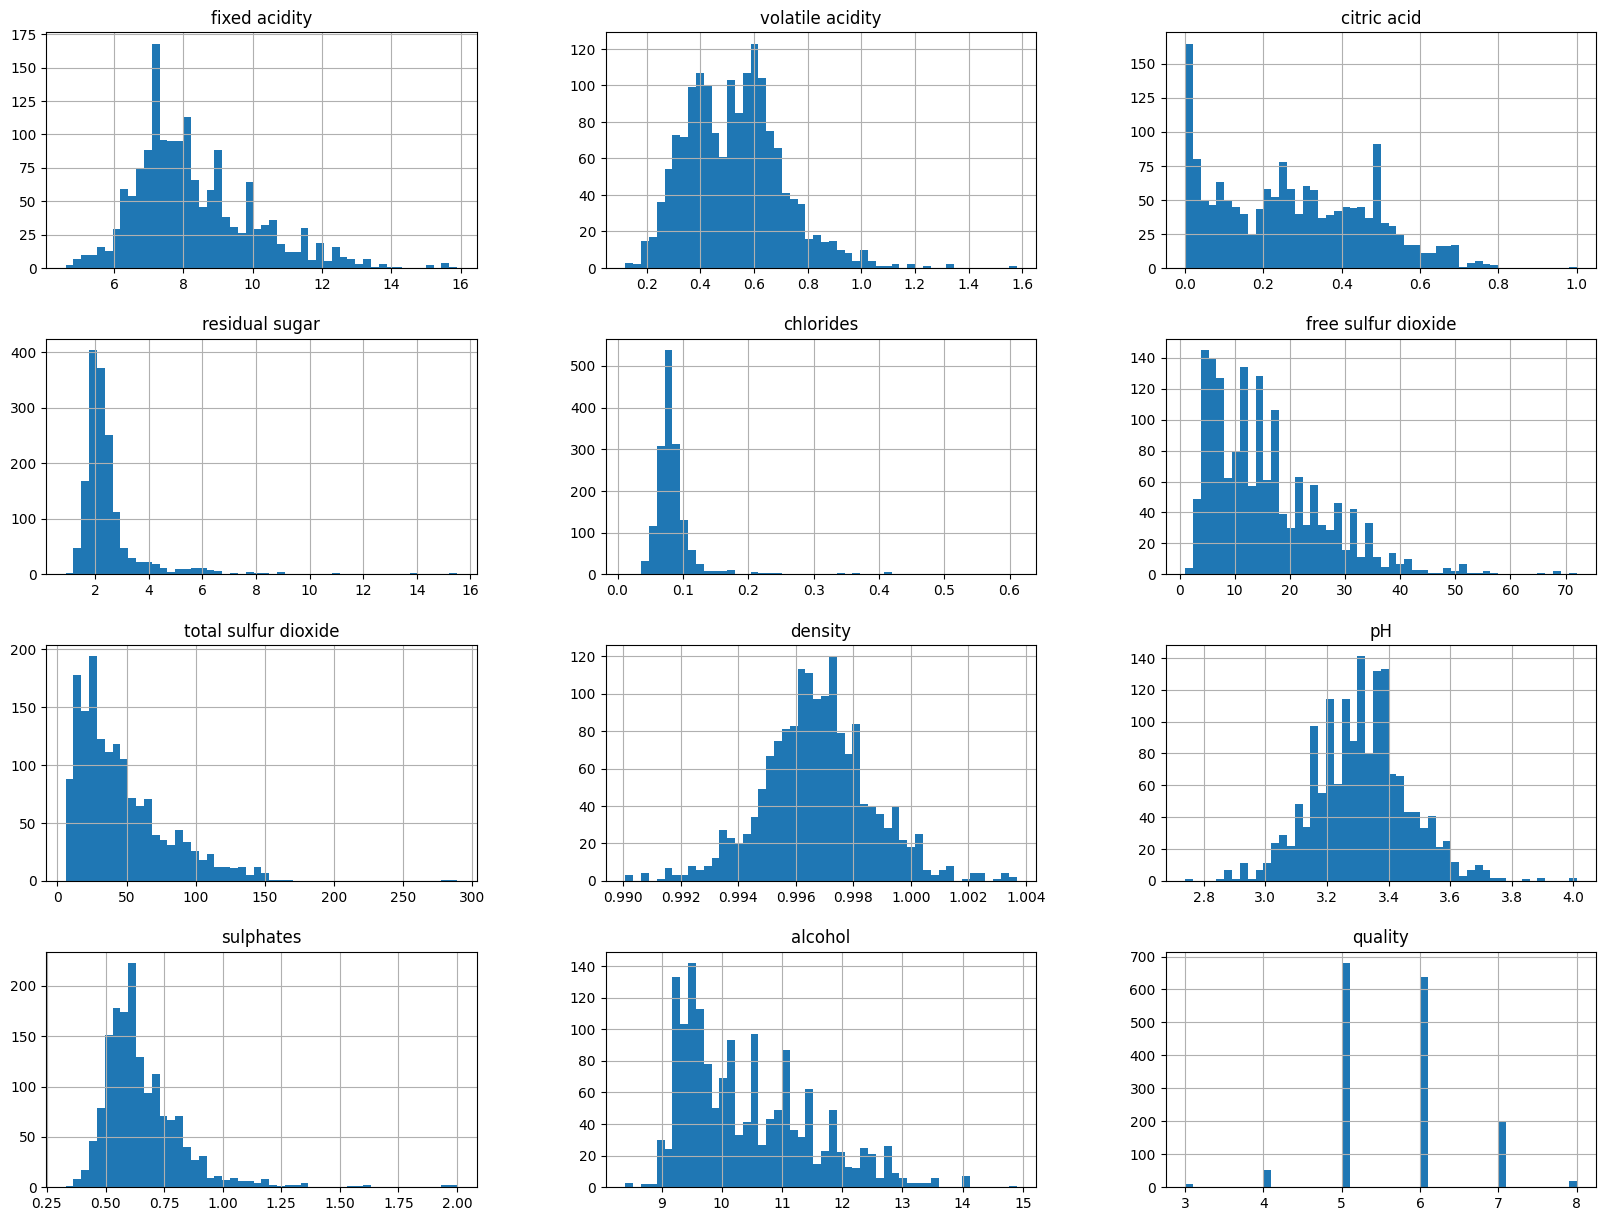

In [30]:
#2.2. Vẽ histogram cho tất cả các biến và nhận xét.
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()
#Nhận xét: Các biến có phân phối không chuẩn.


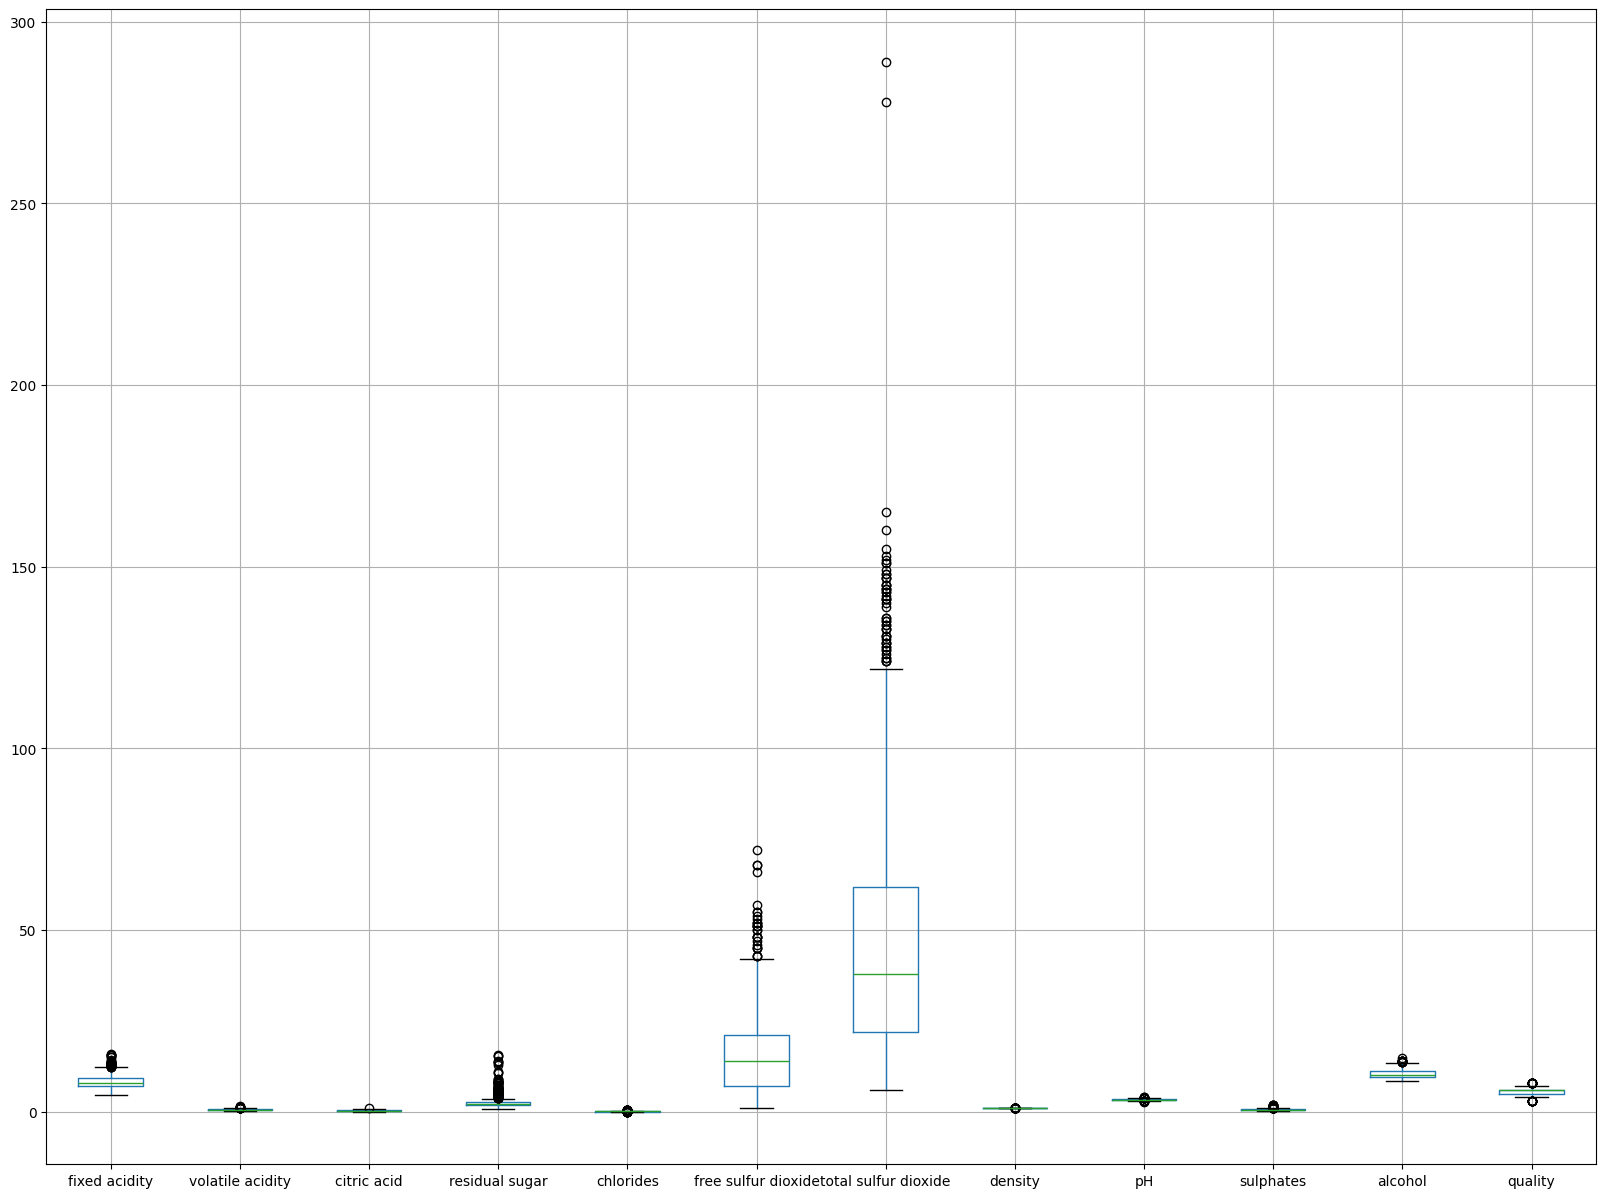

In [33]:
#2.3. Vẽ Boxlot cho tất cả các biến và nhận xét.
data.boxplot(figsize=(20,15))
plt.show()
#Nhận xét:
#- Có nhiều biến có nhiều giá trị ngoại lệ.
#- Có biến có giá trị ngoại lệ ở cả hai phía.
#- Có biến có giá trị ngoại lệ ở phía trên.

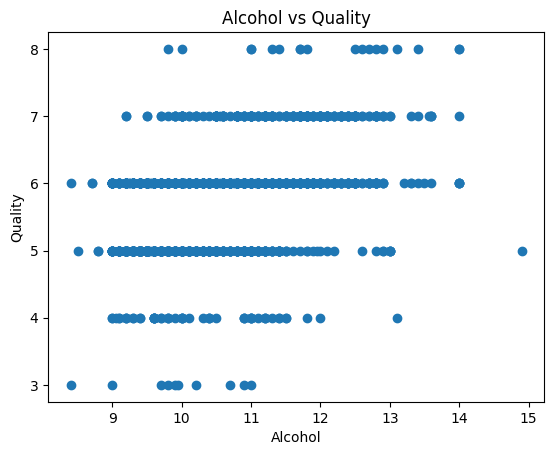

In [35]:
#2.4. Vẽ Scatterplot cho "alcohol" và "quality".
plt.scatter(data['alcohol'], data['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')
plt.show()
#Nhận xét:
#- Có mối tương quan giữa alcohol và quality.
#- Khi alcohol tăng thì quality cũng tăng.
#- Có một số điểm dữ liệu nằm xa so với các điểm dữ liệu còn lại.


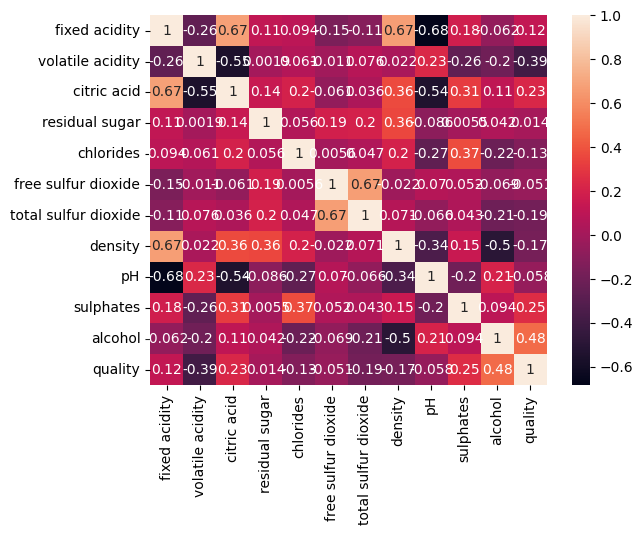

In [36]:
#3. Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan đó.
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)
#corr có nghĩa là correlation ý là tương quan giữa các biến với nhau.
plt.show()
#Nhận xét: Có mối tương quan giữa các biến với nhau.


In [37]:
#4. Chia tập dữ liệu thủ công không dùng thư viện có sẵn.
#Chia tập test 90% đc không? Trả lời: Không.Vì tập test nên chứa ít dữ liệu hơn tập train.
#4.1. Xáo trộn dữ liệu.
import numpy as np
np.random.seed(42)
data = np.random.permutation(data)
print(data)

[[ 7.7   0.56  0.08 ...  0.66  9.6   6.  ]
 [ 7.8   0.5   0.17 ...  0.48  9.5   5.  ]
 [10.7   0.67  0.22 ...  0.98  9.9   6.  ]
 ...
 [ 7.2   0.62  0.06 ...  0.54  9.5   5.  ]
 [ 7.9   0.2   0.35 ...  0.8  11.9   7.  ]
 [ 5.8   0.29  0.26 ...  0.54 13.5   6.  ]]


In [38]:
#4.2. Chia dữ liệu với 80% huấn luyện
train_size = 0.8 
train_data = data[:int(train_size*len(data))]
test_data = data[int(train_size*len(data)):]
print(train_data)
print(test_data)

[[ 7.7   0.56  0.08 ...  0.66  9.6   6.  ]
 [ 7.8   0.5   0.17 ...  0.48  9.5   5.  ]
 [10.7   0.67  0.22 ...  0.98  9.9   6.  ]
 ...
 [ 5.6   0.31  0.78 ...  0.48 10.5   6.  ]
 [ 7.5   0.55  0.24 ...  0.78  9.5   6.  ]
 [ 7.2   0.52  0.07 ...  0.81  9.6   6.  ]]
[[ 8.    0.28  0.44 ...  0.66 11.2   5.  ]
 [ 7.    0.5   0.14 ...  0.61 10.4   5.  ]
 [ 6.    0.5   0.   ...  0.45  9.5   5.  ]
 ...
 [ 7.2   0.62  0.06 ...  0.54  9.5   5.  ]
 [ 7.9   0.2   0.35 ...  0.8  11.9   7.  ]
 [ 5.8   0.29  0.26 ...  0.54 13.5   6.  ]]


In [40]:
#4.3. Tách dữ liệu
train_df = pd.DataFrame(train_data, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
test_df = pd.DataFrame(test_data, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

X_train = train_df.drop('quality', axis=1)
y_train = train_df['quality']
X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']
print (X_train)
print (y_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.7              0.56         0.08            2.50      0.114   
1               7.8              0.50         0.17            1.60      0.082   
2              10.7              0.67         0.22            2.70      0.107   
3               8.5              0.46         0.31            2.25      0.078   
4               6.7              0.46         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1274            8.5              0.28         0.56            1.80      0.092   
1275            7.2              0.35         0.26            1.80      0.083   
1276            5.6              0.31         0.78           13.90      0.074   
1277            7.5              0.55         0.24            2.00      0.078   
1278            7.2              0.52         0.07            1.40      0.074   

      free sulfur dioxide  

In [47]:
#5. Chuẩn bị dữ liệu
from sklearn.preprocessing import StandardScaler
#5.1. Khổi tạo bộ dữ liệu chuẩn hóa.
scaler = StandardScaler()






In [48]:
#5.2. Chuẩn hóa huấn luyện.
X_train = scaler.fit_transform(X_train)
print (X_train)

[[-0.35592521  0.18348583 -0.99124445 ... -0.45482449  0.016453
  -0.74610822]
 [-0.29887905 -0.14931262 -0.52157232 ...  0.51170274 -1.07513483
  -0.83975462]
 [ 1.35545955  0.79361632 -0.26064335 ... -0.19708389  1.9570536
  -0.46516902]
 ...
 [-1.55389454 -1.20317438  2.66176106 ...  0.51170274 -1.07513483
   0.09670937]
 [-0.47001753  0.12801942 -0.15627177 ...  0.89831363  0.74417822
  -0.83975462]
 [-0.641156   -0.03837981 -1.04343025 ...  0.0606567   0.92610953
  -0.74610822]]


In [49]:
#5.3. Chuẩn hóa kiểm tra.
X_test = scaler.transform(X_test)
print (X_test)



[[8.00000000e+00 2.80000000e-01 4.40000000e-01 ... 3.36000000e+00
  6.60000000e-01 1.12000000e+01]
 [7.00000000e+00 5.00000000e-01 1.40000000e-01 ... 3.53000000e+00
  6.10000000e-01 1.04000000e+01]
 [6.00000000e+00 5.00000000e-01 3.03813963e-17 ... 3.36000000e+00
  4.50000000e-01 9.50000000e+00]
 ...
 [7.20000000e+00 6.20000000e-01 6.00000000e-02 ... 3.51000000e+00
  5.40000000e-01 9.50000000e+00]
 [7.90000000e+00 2.00000000e-01 3.50000000e-01 ... 3.32000000e+00
  8.00000000e-01 1.19000000e+01]
 [5.80000000e+00 2.90000000e-01 2.60000000e-01 ... 3.39000000e+00
  5.40000000e-01 1.35000000e+01]]


c:\Users\amii9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [50]:
#6. Ứng dụng mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
#6.1. Khởi tạo
model = LinearRegression()



In [51]:
#6.2. Huấn luyện.
model.fit(X_train, y_train)

LinearRegression()

In [52]:
#6.3. Dự đoán trên tập kiểm tra.
y_pred = model.predict(X_test)
print(y_pred)

[ 1.88325885  6.08182287  5.69695666  5.00172512  4.5437162   3.34794044
  4.57897509  2.30748916  7.00384236  6.33820312  6.45449497  4.56116745
  5.27751451  5.34977564  5.71435601  4.21942047  4.51042807  5.74344711
  4.2644782   3.20218329  2.94085167  1.08980819  5.98800222  3.14205257
 -1.91883163  6.27557875  6.17758414 -3.59887003  6.01812145  7.71617027
  7.73114707  5.13712686  2.13827713  5.13683072  7.91531011 -2.39559723
  3.50269073  4.7996258   3.93872792  5.26352304  5.32050609  0.7900956
  3.74891956  4.5437162   6.70877878 -4.66855557  1.66826498  4.0231646
  5.79467687 -5.09357915  6.59324856  6.27876814 -7.10588326  6.3857488
  7.90348778  5.84570676  7.53294929  4.93130533 -1.88633036  5.23776407
  4.73527594  4.79728377  6.20994192  7.46921903  4.56739237  2.65653391
  5.55370585  4.54317882  4.10330825  7.28119165  1.59189189  4.09872495
 -1.97615147  1.42976013  5.54584108  6.01176429  2.34061087  4.57512995
  4.5039426  -2.08217264  1.74328074  7.86432513 -8.36

In [54]:

#7. Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

#Tính MSE và R^2.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print ('Mean Squared Error:', mse)
print ('R^2:', r2)



Mean Squared Error: 16.374810890542484
R^2: -26.016960479368883


In [55]:
#Bài tập về nhà:
#1. Hoàn thành bài tập trên sao cho đoạn code có thể chạy mượt mà và chính xác.
#2. Cho bộ dữ liệu sau: How long we live 
#2.1. Đọc dữ liệu.
data = pd.read_csv('howlongwelive.csv')
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [56]:
#2.2. Tôi muốn biết có bao nhiêu cột và bao nhiêu hàng.
print(data.shape)

(2938, 22)


In [ ]:
#2.3. Tôi muốn biết danh sách tên của các cột, danh sách của các hàng.
print(data.columns)
print(data.index)

In [58]:
#2.4. Thử dùng df["Status"].
print(data["Status"])

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object


In [60]:
#2.5. Tính số lượng các nước đang phát triển và các nước phát triển.
print(data['Status'].value_counts())
print(data['Status'].value_counts(normalize=True))

Status
Developing    2426
Developed      512
Name: count, dtype: int64
Status
Developing    0.825732
Developed     0.174268
Name: proportion, dtype: float64


In [62]:
#2.6. Tính min, max, mean, median của alcohol.
print(train_df['alcohol'].min())
print(train_df['alcohol'].max())
print(train_df['alcohol'].mean())
print(train_df['alcohol'].median())

8.4
14.9
10.39672921553297
10.1


In [64]:
#Bài 1: Đếm những hàng có rượu nhiều hơn mức trung bình và liệt kê các quốc gia độc đáo này.
#2.6.1. Tính mức trung bình của alcohol.
mean_alcohol = train_df['alcohol'].mean()
print(mean_alcohol)

10.39672921553297


In [66]:
#2.6.2. Lọc ra những hàng có alcohol lớn hơn mức trung bình.
data_alcohol = train_df[train_df['alcohol'] > mean_alcohol]
print(data_alcohol)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               6.7              0.46         0.24             1.7      0.077   
9               5.8              0.61         0.11             1.8      0.066   
10             10.5              0.51         0.64             2.4      0.107   
15              8.9              0.28         0.45             1.7      0.067   
18              9.4              0.30         0.56             2.8      0.080   
...             ...               ...          ...             ...        ...   
1266            6.6              0.58         0.02             2.4      0.069   
1269            8.0              0.62         0.35             2.8      0.086   
1271            7.1              0.43         0.42             5.5      0.071   
1274            8.5              0.28         0.56             1.8      0.092   
1276            5.6              0.31         0.78            13.9      0.074   

      free sulfur dioxide  

In [68]:
#2.6.3. Liệt kê các giá trị unique của cột 'quality'.
print(data_alcohol['quality'].unique())

[6. 7. 8. 5. 4. 3.]


In [70]:
#Bài 2: Lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình.
#2.6.1. Tính mức trung bình của schooling và GDP.
mean_schooling = data['Schooling'].mean()
mean_gdp = data['GDP'].mean()
print(mean_schooling)
print(mean_gdp)

11.992792792792793
7483.158469138474


In [72]:
#2.6.2. Lọc ra những hàng có Schooling và GDP lớn hơn mức trung bình.
data_schooling = data[data['Schooling'] > mean_schooling]
data_gdp = data[data['GDP'] > mean_gdp]
print(data_schooling)
print(data_gdp)

      Country  Year      Status  Life expectancy   Adult Mortality  \
16    Albania  2015  Developing              77.8             74.0   
17    Albania  2014  Developing              77.5              8.0   
18    Albania  2013  Developing              77.2             84.0   
19    Albania  2012  Developing              76.9             86.0   
20    Albania  2011  Developing              76.6             88.0   
...       ...   ...         ...               ...              ...   
2906   Zambia  2015  Developing              61.8             33.0   
2907   Zambia  2014  Developing              61.1            314.0   
2908   Zambia  2013  Developing              63.0            328.0   
2909   Zambia  2012  Developing              59.2            349.0   
2910   Zambia  2011  Developing              58.2            366.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
16                0     4.60              364.975229         99.0         0   
1